<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=4>
  <h1>
     پروژه یادگیری ماشین
    </h1>
    فاز اول -
    زینب‌سادات ساقی
    -
    96105818
    <hr>
<hr>
<hr>
    </font>
</div>

<div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=5 color='purple'>
 * EDA and Feature Engineering
    <hr>
    </font>
    
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
    ابتدا کتابخانه‌های لازم را 
    import 
    میکنیم.
    </font>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import seaborn as sns2
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from matplotlib import pyplot
import warnings                                            
warnings.filterwarnings('ignore') 
# pip install openpyxl xlsxwriter xlrd



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
   ابتدا سعی می‌کنیم با استفاده از توابع مختلف داده‌های جدول را بررسی کرده و بشناسیم.بنابراین
     با استفاده از کتابخانه
    pandas
    فایل اکسل را خوانده و در دیتافریم
    data
    ذخیره میکنیم.
    </font>
</div>

In [2]:
data = pd.read_excel("ICUfinal.xlsx")
print(data.shape)
data.drop('Unnamed: 0',axis='columns', inplace=True)
data.head()

(1925, 227)


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
    برای بررسی وضعیت داده‌ها و پراکندگی آن از 
    describe
    استفاده میکنیم.
    </font>
</div>

In [3]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,0.605263,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.605263,0.605263,0.605263,0.605263,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 226 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(219), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
data.isna().mean()

PATIENT_VISIT_IDENTIFIER      0.000000
AGE_ABOVE65                   0.000000
AGE_PERCENTIL                 0.000000
GENDER                        0.000000
HTN                           0.002597
                                ...   
TEMPERATURE_DIFF_REL          0.360519
OXYGEN_SATURATION_DIFF_REL    0.356364
WINDOW                        0.000000
tags                          0.735065
ICU                           0.000000
Length: 226, dtype: float64


<div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=3 color='purple '>
    ## Cleaninig dataset
    </font>
</div>



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
همانطور که می‌بینیم برخی ستونها داده‌ی
    NaN
    ندارند ولی برخی از ستون هاو ردیف ها تعداد داده‌های
    NaN
    شان بالاست. داده‌های 
    null 
    باعث کاهش عملکرد مدل می‌شوند. میتوانیم با در نظر گرفتن یک 
    limit
    برای تعداد
    null
    ها ،ستونها و ردیف ی نامناسب را حذف کنیم.
    </font>
</div>

In [6]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]

data.shape


(821, 225)

In [7]:
data.head(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
6,1,1,90th,1,1.0,1.0,1.0,-0.210526,-0.210526,-0.210526,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
8,1,1,90th,1,1.0,1.0,1.0,0.605263,0.605263,0.605263,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,1.0,1.0,1.0,0.605263,0.605263,0.605263,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1
10,2,0,10th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
14,2,0,10th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1
19,3,0,40th,1,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,...,-0.047619,-0.171717,-0.308696,-0.057718,-0.069094,-0.329749,-0.047619,-0.172436,ABOVE_12,0
20,4,0,10th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
22,4,0,10th,0,0.0,0.0,0.0,0.605263,0.605263,0.605263,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,4-6,0


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
   می بینیم که پس از پاکسازی تعداد نمونه‌ها و ستون‌ها کاهش یافت
    اما همچنان خانه‌های 
    null
    در جدول وجود دارند که میتواند در زمان مدلسازی مشکل ساز باشند.
    رویکرد دیگری که برای داده‌های
    null
    میتوان در نظر گرفت، جایگذاری مقادیر آنها با میانگین داده ها و یا مد است
   .
    </font>
</div>

In [8]:
#Filling missing values with medians of the columns
data = data.fillna(data.median())
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,4-6,0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
6,1,1,90th,1,1.0,1.0,1.0,-0.210526,-0.210526,-0.210526,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
8,1,1,90th,1,1.0,1.0,1.0,0.605263,0.605263,0.605263,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,1.0,1.0,1.0,0.605263,0.605263,0.605263,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,382,0,50th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,-0.500000,-0.838384,-0.513996,-0.236377,-0.617378,-0.191851,-0.498615,-0.835052,ABOVE_12,1
1916,383,0,40th,1,0.0,0.0,0.0,0.605263,0.605263,0.605263,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,2-4,0
1919,383,0,40th,1,0.0,0.0,1.0,0.210526,0.210526,0.210526,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,ABOVE_12,0
1921,384,0,50th,1,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
   اکنون مقادیر
    null
   جدول جایگذاری شدند. 
    نکته‌ی دیگری که در دیتاست داریم این است که ستون‌هایی که نتایج آزمایش بیمار را نشان میدهند نام‌های متفاوت  و مقدار یکسان دارند.
    به ستون‌های
    (ALBUMIN_MEDIAN,ALBUMIN_MIN,ALBUMIN_MAX)
    دقت شود،
    دراقع 
    مقادیر 
    MIN,MAX,MEDIAN,MEAN
    برای هر آزمایش یک عدد میباشد.
    این تکراری بودن مقدار باعث ایجاد
    redundency
    میشود لذا ستونهایی که مقدار یکسان داشته را حذف کرده و تنها ستونن 
    MEAN
    را نگه میداریم.
    </font>
</div>



In [9]:
j=7
col_list = data.columns.tolist()
lidx=col_list.index('DIMER_MAX')
redun_cols = []
for i in range((data.shape[0])):
    while j < lidx:
        redun_cols.append(data.columns[j])
        redun_cols.append(data.columns[j+2])
        redun_cols.append(data.columns[j+3])
        redun_cols.append(data.columns[j+4])
        j+=5
        
new_data = data.drop(redun_cols,axis='columns')
new_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
2,0,1,60th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,4-6,0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
6,1,1,90th,1,1.0,1.0,1.0,-0.210526,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
8,1,1,90th,1,1.0,1.0,1.0,0.605263,-0.839572,-1.000000,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,1.0,1.0,1.0,0.605263,-0.914439,-0.916230,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,382,0,50th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.500000,-0.838384,-0.513996,-0.236377,-0.617378,-0.191851,-0.498615,-0.835052,ABOVE_12,1
1916,383,0,40th,1,0.0,0.0,0.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,2-4,0
1919,383,0,40th,1,0.0,0.0,1.0,0.210526,-1.000000,-1.000000,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,ABOVE_12,0
1921,384,0,50th,1,0.0,0.0,1.0,0.605263,-1.000000,-0.717277,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0


In [10]:
new_data.nunique(axis=0)


PATIENT_VISIT_IDENTIFIER      383
AGE_ABOVE65                     2
AGE_PERCENTIL                  10
GENDER                          2
HTN                             2
                             ... 
RESPIRATORY_RATE_DIFF_REL     156
TEMPERATURE_DIFF_REL          343
OXYGEN_SATURATION_DIFF_REL    154
WINDOW                          5
ICU                             2
Length: 81, dtype: int64

In [11]:
new_data.WINDOW.unique()


array(['4-6', 'ABOVE_12', '2-4', '6-12', '0-2'], dtype=object)


<div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=3 color='purple '>
    ** Feature Split
    </font>
</div>


<div dir="rtl">
داده‌های ستون 
tags 
را به صورت خانه‌های. جدا در میاوریم و در ستون جدیدی به اسم
Tags
ذخیره میکنیم.

</div>

In [12]:
# data.tags.unique()
# data["Tags"] = data["tags"].str.split(',')
# data.head(100)


<div dir="rtl">
</div>


<div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=3 color='purple '>
    ** Removing Outliers
    </font>
</div>



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
در گام بعدی بررسی
Outlier
هاست. اگر به خروجی
describe
داده‌ها توجه کنیم:
</font>
</div>

In [13]:
new_data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,189.257004,0.471376,0.365408,0.243605,0.153471,0.870889,0.528527,-0.963433,-0.931121,-0.310924,...,-0.528337,-0.569254,-0.812638,-0.618211,-0.490238,-0.655371,-0.543441,-0.569899,-0.813222,0.350792
std,111.140083,0.499484,0.481838,0.429519,0.360661,0.335527,0.224100,0.160870,0.169509,0.100256,...,0.493723,0.299881,0.340325,0.324053,0.409707,0.262379,0.450815,0.298583,0.340830,0.477509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,94.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.605263,-1.000000,-1.000000,-0.317073,...,-0.823529,-0.738095,-0.939394,-0.826087,-0.734033,-0.814971,-0.817204,-0.736640,-0.940077,0.000000
50%,188.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.605263,-1.000000,-1.000000,-0.317073,...,-0.705882,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,0.000000
75%,286.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.605263,-1.000000,-0.958115,-0.317073,...,-0.411765,-0.428571,-0.838384,-0.537888,-0.335026,-0.557252,-0.390681,-0.425397,-0.840206,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
در برخی از ستون‌ها
    احتمال 
   وجود
    outlier
    هست. برای بررسی 
    outlier
    ها بهترین راه تصویر سازی مناسب است.
    برای مثال سه ویژگی از جدول را به دو صورت نمایش می‌دهیم:
    </font>
</div>

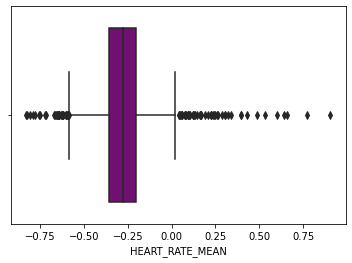

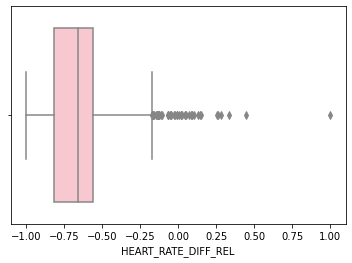

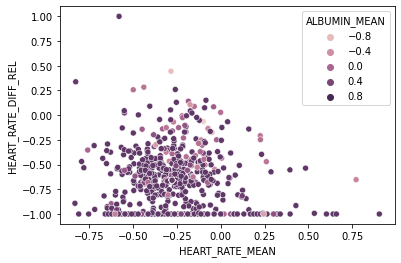

In [14]:
sns.boxplot(x=new_data['HEART_RATE_MEAN'],color='purple')
plt.show()




sns.boxplot(x=new_data['HEART_RATE_DIFF_REL'],color="pink")
plt.show()



sns.scatterplot(data=new_data, x="HEART_RATE_MEAN", y="HEART_RATE_DIFF_REL" , hue='ALBUMIN_MEAN')
plt.show()

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
همانطور که در دو نمودار اول میتوان دید
    دو داده‌ی نسبتا دورتر و پرت در سمت راست نمودار داریم. هم چنین در نمودار دوم نقطه‌ی سمت راست با فاصله‌ی زیاد قرار دارد.
در نمودار سوم نیز که نمودار
    scatter
    می باشد، تراکم داده در قسمت سمت چپی نمودار است ولی تعدادی داده‌ی اندک در سمت راست نمودار
    قرار دارند.
    این 
    outlier
    ها میتوانند در زمان مدل و یادگیری تاثیر بگذارند مخصوصا برای مدل‌هایی که تابع
    خطای آنها
    square error 
   است باعث انحراف میشوند.
</font>
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
روش دیگر بررسی
    outlier
    ها روش محاسباتی است.
    دو روش محاسباتی برای یافتن 
    outlier
    ها:
   Standard deviation
    ،
    Percentile
    و روش
    Z-Score
    است.
    ما در اینجا با این روش 
    outlier 
    ها را یافته و در کل دیتافریم
    حذف می‌کنیم.
مفهوم
    z-score
    توصیف هر نقطه داده با یافتن رابطه آنها با انحراف معیار و میانگین گروه نقاط داده است.
    درواقع
    z_score
    یافتن توزیع داده ها در جایی است که میانگین 0 و انحراف استاندارد 1 یعنی توزیع نرمال است.
    هنگام محاسبه‌ی 
    z_score
    داده ها را مجدداً مقیاس و مرکز می کنیم و به دنبال نقاط داده ای می گردیم که خیلی از صفر فاصله دارند. با این نقاط داده ای که فاصله آنها از صفر فاصله زیادی وجود دارد ، به عنوان نقاط دورافتاده تلقی می شوند. در بیشتر موارد ، از آستانه 3 یا -3 استفاده می شود ، یعنی اگر مقدار
    Z_score
    به ترتیب از 3 یا -3 بیشتر یا کمتر باشد ، آن نقطه داده به عنوان نقاط دور مشخص می شود.
    </font>
</div>

In [15]:
z_scores = stats.zscore(new_data.select_dtypes('number'))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
limited_data = new_data[filtered_entries]
limited_data


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
2,0,1,60th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,4-6,0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
10,2,0,10th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,0-2,0
14,2,0,10th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1
20,4,0,10th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,382,0,50th,0,0.0,0.0,0.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,4-6,0
1916,383,0,40th,1,0.0,0.0,0.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,2-4,0
1919,383,0,40th,1,0.0,0.0,1.0,0.210526,-1.000000,-1.000000,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,ABOVE_12,0
1921,384,0,50th,1,0.0,0.0,1.0,0.605263,-1.000000,-0.717277,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0


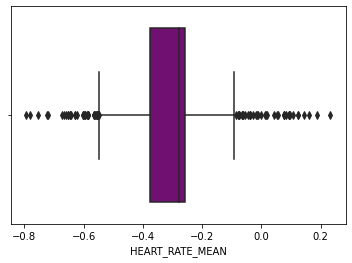

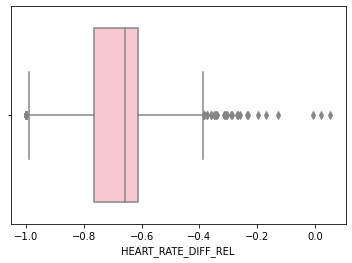

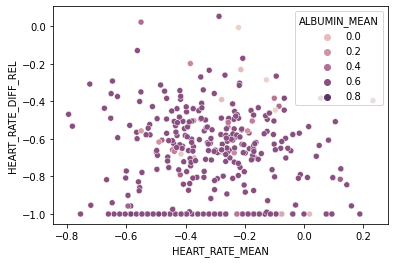

In [16]:
sns.boxplot(x=limited_data['HEART_RATE_MEAN'],color='purple')
plt.show()




sns.boxplot(x=limited_data['HEART_RATE_DIFF_REL'],color="pink")
plt.show()



sns.scatterplot(data=limited_data, x="HEART_RATE_MEAN", y="HEART_RATE_DIFF_REL" , hue='ALBUMIN_MEAN')
plt.show()

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
همانطور که  مشاهده می‌شود داده‌های
    outlier
    حذف شده و نمودار سوم پراکندگی بهتری را نمایش میدهد
</font>
</div>


<div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=3 color='purple '>
    ** Map to numbers
    </font>
</div>



<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
برای یک پارچه سازی داده‌های و عملکرد بهتر میتوان ستونهای 
    categorical
    داده که به 
    صورت
    string
    هستند را به مقداری عددی
    نگاشت کرد.
    ابتدا بررسی کنیم چه ستونهای غیر عددی داریم:
    </font>
</div>

In [17]:
num_cols = limited_data.select_dtypes(include=['number'])
catg_cols=[]
col_list = limited_data.columns.tolist()
for x in col_list:
    if x not in num_cols:
        catg_cols.append(x)
        
(catg_cols )

['AGE_PERCENTIL', 'WINDOW']

In [18]:
limited_data.AGE_PERCENTIL.unique()

array(['60th', '10th', '70th', '20th', '50th', '80th', '30th', '40th',
       '90th', 'Above 90th'], dtype=object)

In [19]:
limited_data.WINDOW.unique()

array(['4-6', 'ABOVE_12', '0-2', '2-4', '6-12'], dtype=object)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
داده‌های 
    AGE_PERCENTIL
   را میتوان به 
اعداد ۱ تا ۱۰ و
    WINDOW
    را به ۱ تا ۵ 
    نگاشت کرد.
    </font>
</div>

In [20]:
perc_to_num = {'10th': 10, '20th': 20,'30th':30,'40th':40,'50th':50,'60th':60,'70th':70,'80th':80,'90th':90,'Above 90th':100}

limited_data['AGE_PERCENTIL'].replace(perc_to_num,inplace=True)

window_to_num = {'4-6':5, 'ABOVE_12':10, '0-2':1, '2-4':3, '6-12':8}

limited_data['WINDOW'].replace(window_to_num,inplace=True)

limited_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
2,0,1,60,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,5,0
4,0,1,60,0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,10,1
10,2,0,10,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0
14,2,0,10,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,10,1
20,4,0,10,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,382,0,50,0,0.0,0.0,0.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,5,0
1916,383,0,40,1,0.0,0.0,0.0,0.605263,-1.000000,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,3,0
1919,383,0,40,1,0.0,0.0,1.0,0.210526,-1.000000,-1.000000,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,10,0
1921,384,0,50,1,0.0,0.0,1.0,0.605263,-1.000000,-0.717277,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3,0



<div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=5 color='purple '>
 *Visualization and Analyzing relationships between variables
    <hr>
    </font>
</div>



In [21]:
def plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

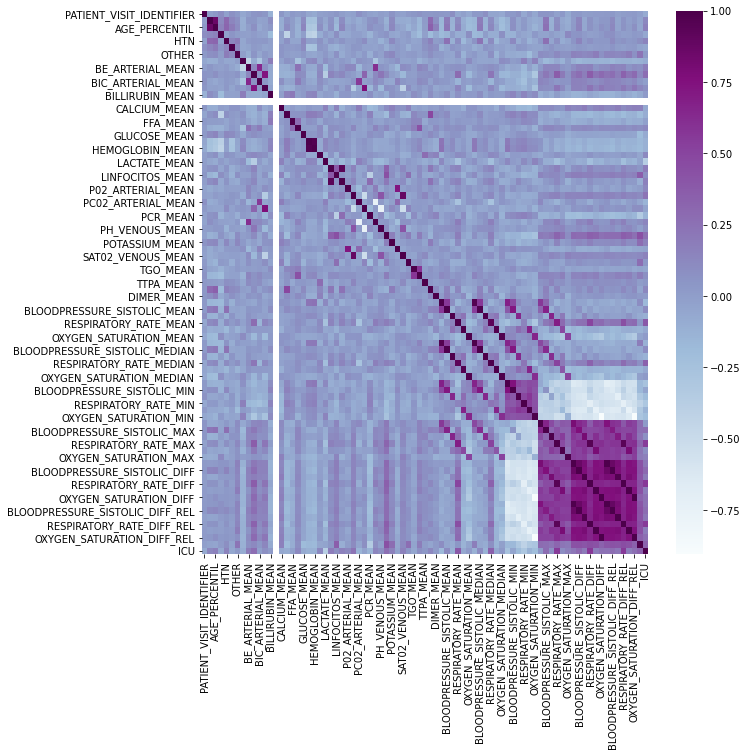

In [22]:
# calculate correlation matrix
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
corr = limited_data.corr()
sns.heatmap(corr,cmap='BuPu',ax=ax)
plt.show()

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
در نمودار
    heatmap
   نقاط تیره تر رابطه مستقیم با یکدیگر دارند و  نقاط کمرنگ تر
    رابطه معکوس تر. طبق این نمودار 
   PH_ALTERIIAL_MEAN
    با 
 BE_ALTERIAL_MEAN
    نسبت مستقیمم دارد و هرچه 
    یکی زیادتر شود دیگری نیز زیاد میشود.
    </font>
</div>

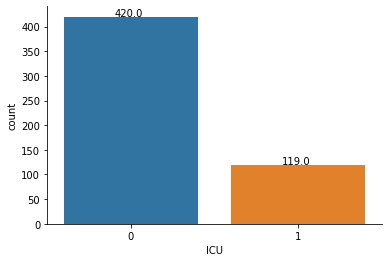

In [23]:
ax=sns.countplot(x=limited_data["ICU"])
plot_num(ax,0.3,1)

plt.show()

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
    با کمک این نمودار متوجه می شویم که تعداد نمونه‌های کلاس یک بسیار کمتر از داده‌های نمونه‌ی دسته‌ی صفر هستند. درواقع
    داده‌ها
    imbalanced
    هستند.
    </font>
    </div>

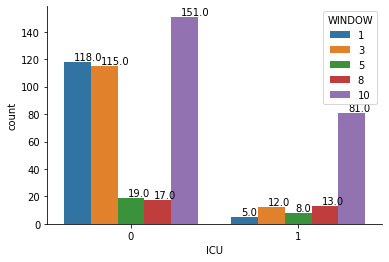

In [24]:
ax = sns.countplot('ICU',hue='WINDOW', data = limited_data)
plot_num(ax,0.06,1.4)
plt.show()

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
   این نمودار نشان میدهد تعداد بیمارانی که اطلاعات آنها در بازه‌ی 
    0-2
    ساعت ثبت شده است، در نهایت وارد 
    ICU
    نشده اند.
    </font>
</div>

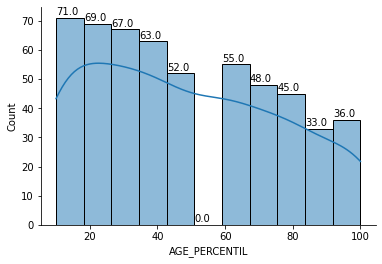

In [25]:
ax=sns.histplot(data=limited_data, x="AGE_PERCENTIL", kde=True)
plot_num(ax,0.08,1)
plt.show()

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
در این نمودار می بینیم که بیماری که 
    AGE_PERCENTIL
    آن بین ۵۰ تا ۶۰ باشد ثبت نشده است و اکثر بیماران کمتر از 
    20th 
    بوده اند.
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
 در ادامه توزیع برخی از اطلاعات آزمایش بیمار و نمودار پراکندگی آنها قرار دارد.
    </font>
</div>

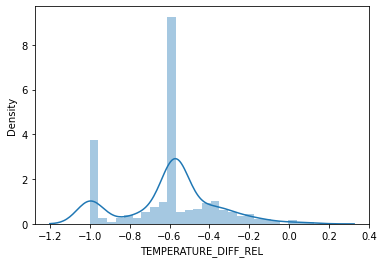

In [26]:
sns.distplot(limited_data['TEMPERATURE_DIFF_REL'])
plt.show()

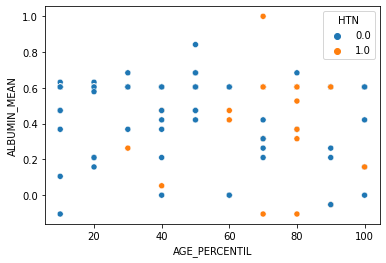

In [27]:
sns.scatterplot(data=limited_data, x="AGE_PERCENTIL", y="ALBUMIN_MEAN",hue="HTN")
plt.show()

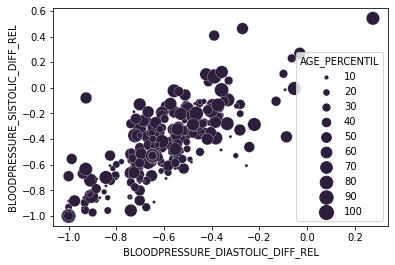

In [28]:
sns.scatterplot(
    data=limited_data, x="BLOODPRESSURE_DIASTOLIC_DIFF_REL", y="BLOODPRESSURE_SISTOLIC_DIFF_REL", hue="AGE_PERCENTIL", size="AGE_PERCENTIL",
    sizes=(10, 200), hue_norm=(0, 5), legend="full"
)

plt.show()

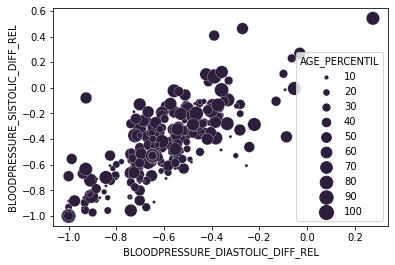

In [29]:
sns.scatterplot(
    data=limited_data, x="BLOODPRESSURE_DIASTOLIC_DIFF_REL", y="BLOODPRESSURE_SISTOLIC_DIFF_REL", hue="AGE_PERCENTIL", size="AGE_PERCENTIL",
    sizes=(10, 200), hue_norm=(0, 5), legend="full"
)

plt.show()

<div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=5 color='purple '>
  *Models and Evaluation
    <hr>
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
    در این بخش به بررسی مدلها و ارزیابی آنها و در نهایت انتخاب مدل نهایی می‌پردازیم.
    باتوجه به ماهیت مسئله از مدلهای 
    classification
    بر روی داده استفاده می‌کنیم.
    در این بخش چند  تا از پرکاربردترین مدلهای
    classification
    را بررسی می‌کنیم.
        </font>
</div>

<hr>
<hr>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
در ابتدا کتابخانه‌های لازم و توابع را 
import
میکنیم.
کتابخانه‌ای که در این بخش استفاده میشود.
Sklearn
می‌باشد.
تمام مدلها و متریک‌های لازم را میتوان از این کتابخانه 
import
کرد.
    </font>
</div>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score ,accuracy_score ,precision_score,recall_score


 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
   آخرین شکل داده را به دو دسته
    X
    و 
    y
    تقسیم می‌کنیم.
    ۲۵
    درصد از داده‌های را برای
    تست جدا در نظر می‌گیریم.
        </font>
</div>

In [31]:
X = limited_data.iloc[: ,:-1]
y = limited_data.iloc[: ,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8675309)


 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
   اکنون داده‌ها را روی مدل تست میکنیم.
    الگوریتم‌هایی که در این بخش کار میشوند شامل:
    KNN,
    LogisticRegression,
        Random forests,
    GaussianNB,
Support Vector Machine(SVM),
    eXtreme Gradient Boosting,
    می‌باشند که توضیح خلاصه‌ای از هریک و ارتباطشان با ویژگی هاآمده است.
        </font>
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
1)
    Logistic Regression
    یک الگوریتم طبقه بندی است ، زمانی استفاده می شود که مقدار متغیر هدف ماهیت طبقه بندی داشته باشد.
    Logistic Regression
    معمولاً هنگامی استفاده می شود که داده مورد نظر دارای خروجی باینری باشد ، بنابراین وقتی به یک کلاس یا کلاس دیگر تعلق 
    داشته باشد
    مقدار
    target
    صفر یا یک می باشد.
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
    2)
    Random forests
    یک الگوریتم یادگیری
    تحت نظارت است.
    هم برای طبقه بندی و هم برای رگرسیون قابل استفاده است. همچنین انعطاف پذیرترین و آسان ترین الگوریتم است.
    یک جنگل از
    trees
    تشکیل شده است و هرچه درختان آن بیشتر باشد ، جنگل نیز از استحکام بیشتری برخوردار است. 
    Random forests
    decision trees
    را بر روی نمونه های داده ای که به طور تصادفی انتخاب شده اند ایجاد می کنند ، از هر درخت پیش بینی می کنند و با استفاده از رای گیری بهترین راه حل را انتخاب می کنند. همچنین یک شاخص بسیار خوب از 
 feature importance 
    را فراهم می کند.
        </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
    3)
    KNeighborsClassifier(KNN)
    بسیار ساده ، قابل فهم ، همه کاره و یکی از برترین الگوریتم های یادگیری ماشین است. KNN در انواع برنامه ها مانند امور مالی ، بهداشت ، علوم سیاسی ، تشخیص دست خط ، تشخیص تصویر و تشخیص فیلم استفاده می شود. در رتبه بندی های اعتباری ، موسسات مالی رتبه اعتباری مشتریان را پیش بینی می کنند.
الگوریتم 
    KNN
    برای مشکلات طبقه بندی و رگرسیون استفاده می شود.
الگوریتم
        KNN
    بر اساس رویکرد 
    feature similarity
    است.
        </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
4)
    مفاهیم 
SVM 
نسبتاً ساده هستند. دسته بند با استفاده از یک 
hyperplane 
با بیشترین مقدار حاشیه ، داده ها را از هم جدا می کند. به همین دلیل یک طبقه بندی 
SVM 
به عنوان طبقه بندی 
discriminative
نیز شناخته می شود. 
SVM
یک 
hyperplane 
بهینه پیدا می کند که به طبقه بندی نقاط داده جدید کمک می کند.
            </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
5)
Naive Bayes
    یک تکنیک طبقه بندی آماری است که بر اساس قضیه 
    Bayes
    ساخته شده است. این یکی از ساده ترین الگوریتم های یادگیری تحت نظارت است
    .
    Naive Bayes
    الگوریتمی سریع ، دقیق و قابل اعتماد است. 
    Naive Bayes Classifier
    در مجموعه داده های بزرگ دارای دقت و سرعت بالایی هستند.
    Naive Bayes Classifier
    فرض می کند که تأثیر یک ویژگی خاص در یک کلاس، مستقل از سایر ویژگی ها است.
     حتی اگر این ویژگی ها به هم وابسته باشند ، این ویژگی ها  به طور مستقل در نظر گرفته می شوند. این فرض محاسبات را ساده می کند و به همین دلیل آن را
    Naive 
   می نامند.
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
6)
     در یادگیری ماشین ، مدلهای 
    ensemble 
    عملکرد بهتری نسبت به مدلهای منفرد با احتمال زیاد دارند. یک مدل
    ensemble
    ترکیبی از مدلهای مختلف یادگیری ماشین در یک مدل است.
Bagging   
    به معنای 
    "bootstrap aggregation"
    است ، به این معنی که نمونه ها با جایگزینی
    (bootstrapping)
    انتخاب می شوند و با گرفتن میانگین آنها ترکیب می شوند 
    (aggregatedد).
XGBoost 
مخفف کلمه 
"eXtreme Gradient Boosting"
است.
"eXtreme"
به پیشرفت های سریع مانند محاسبه موازی و آگاهی از حافظه پنهان اشاره دارد که باعث می شود
XGBoost تقریباً 10 برابر سریعتر از افزایش گرادیان سنتی باشد. علاوه بر این
، 
XGBoost
شامل یک الگوریتم منحصر به فرد یافتن تقسیم برای بهینه سازی درختان ، همراه با تنظیم داخلی داخلی است که باعث می شود تا ازدیاد مناسب استفاده شود. به طور کلی ،
XGBoost
نسخه سریعتر و دقیق تری از
Gradient Boosting
است.
       </font>
</div>

<hr>
<hr>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
    معیار ارزیابی اصلی 
   همانطور که گفته شده است.
    F1_score
    می باشد ولی برای بررسی بیشتر 
    سایر معیارهای
    precision,recall,accuracy
    را نیز
    بررسی می‌کنیم.
    نوع 
    F1_score
    ای که اینجا بررسی میکنیم،
    weighted
    است. زیرا همانطور که در بخش 
    visualization
    دیدیم داده‌ها 
    imbalanced
    هستند و تعداد دسته‌ها نامتوان اند. این مورد باعث میشود نتایجی که از معیارها میگیریم
    لزوما صحیح نباشند مخصوصا
    accuracy
    لذا از 
    weighted
    استفاده میکنیم تا درحین ارزیابی داد‌های را با روش مخصوصی
    balanced
   کند.
        </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
    هم چنین برای
    train
    داده‌های از
    روش
    Cross_validation
    نیز استفاده میکنیم.
    با استفاده از این روش میتوان روی همه‌ی داده
    prediction 
    انجام داد،به معیاهای دقیقتر و بهتری درمورد الگوریتم دست یافت،
    و 
    Parameters Fine-Tuning
    انجام داد.
        </font>
</div>

In [32]:
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
   
    dfs = []
    models =[
          ('*LogisticReg*', LogisticRegression()), 
          ('*RandForests*', RandomForestClassifier()),
          ('*KNN*', KNeighborsClassifier()),
          ('*SVM*', SVC()), 
          ('*GNB*', GaussianNB()),
          ('*XGB*', XGBClassifier(eval_metric='mlogloss'))
        ]
    results = []
    names = []
    metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    
    
    for name, model in models:
        
        # Kfold on train data for better performance
        
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=901234)
        
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=metrics)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        print(name)
        print("F1_score:",f1_score(y_test, y_pred,average='weighted') 
              , "-- Accuracy:",accuracy_score(y_test, y_pred),
             "-- Precision:",precision_score(y_test, y_pred,average='weighted'),
              "-- Recall:",recall_score(y_test, y_pred,average='weighted'))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        
    final = pd.concat(dfs, ignore_index=True)
    return final
        

In [33]:
runs_res = run_models(X_train,y_train,X_test,y_test)

*LogisticReg*
F1_score: 0.8292356820962784 -- Accuracy: 0.8444444444444444 -- Precision: 0.8382839282113328 -- Recall: 0.8444444444444444
*RandForests*
F1_score: 0.8292356820962784 -- Accuracy: 0.8444444444444444 -- Precision: 0.8382839282113328 -- Recall: 0.8444444444444444
*KNN*
F1_score: 0.662320987654321 -- Accuracy: 0.7111111111111111 -- Precision: 0.6363037690906543 -- Recall: 0.7111111111111111
*SVM*
F1_score: 0.6603797074385309 -- Accuracy: 0.762962962962963 -- Precision: 0.5821124828532236 -- Recall: 0.762962962962963
*GNB*
F1_score: 0.837448864728331 -- Accuracy: 0.8444444444444444 -- Precision: 0.8365252525252526 -- Recall: 0.8444444444444444
*XGB*
F1_score: 0.8549517760526935 -- Accuracy: 0.8666666666666667 -- Precision: 0.864927536231884 -- Recall: 0.8666666666666667


 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
    اگر به نتایج مدلها دقت کنیم می‌بینیم که
    مدل
    XGBClassifier
    در تمام معیارها نتیجه‌ی بهتری داشته و پس از آن
    الگوریتم
    RandForests
    و سپس
    LogisticRegression
    بهتر و نزدیک به هم عمل کرده‌اند. 
    برای به دست اوردن شهود بهتری از توزیع متریک‌ها
    با روش
    Empirical Bootstrapping
    (روشی که اختلاف 
    میانگین
    bootstrapped 
    و
    میانگین نمونه را تخمین میزند)
    برای ۵۰ نمونه انجام میدهیم.
    </font>
</div>

In [34]:

bootstraps = []
for model in list(set(runs_res.model.values)):
    model_df = runs_res.loc[runs_res.model == model]
    bootstrap = model_df.sample(n=50, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')



 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
داده‌ها را به دو دسته برای تست عملکرد و تست 
    fit-time
    که زمان 
    train
    را اندازه میگیرد،      
    تقسیم 
   می کنیم تا در کنار معیارهای عملکرد زمان انجام الگورریتم ها هم بتوان بررسی کرد.
    </font>
</div>

In [35]:
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')


results_long

,model,metrics,values
0,*KNN*,fit_time,0.002719
1,*KNN*,fit_time,0.002841
2,*KNN*,fit_time,0.003058
3,*KNN*,fit_time,0.003057
4,*KNN*,fit_time,0.003058
...,...,...,...
1795,*RandForests*,test_f1_weighted,0.855874
1796,*RandForests*,test_f1_weighted,0.879805
1797,*RandForests*,test_f1_weighted,0.934733
1798,*RandForests*,test_f1_weighted,0.855874


 <div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=4 color='purple'>
    **Performance Metrics BoxPlot
    </font>
</div>

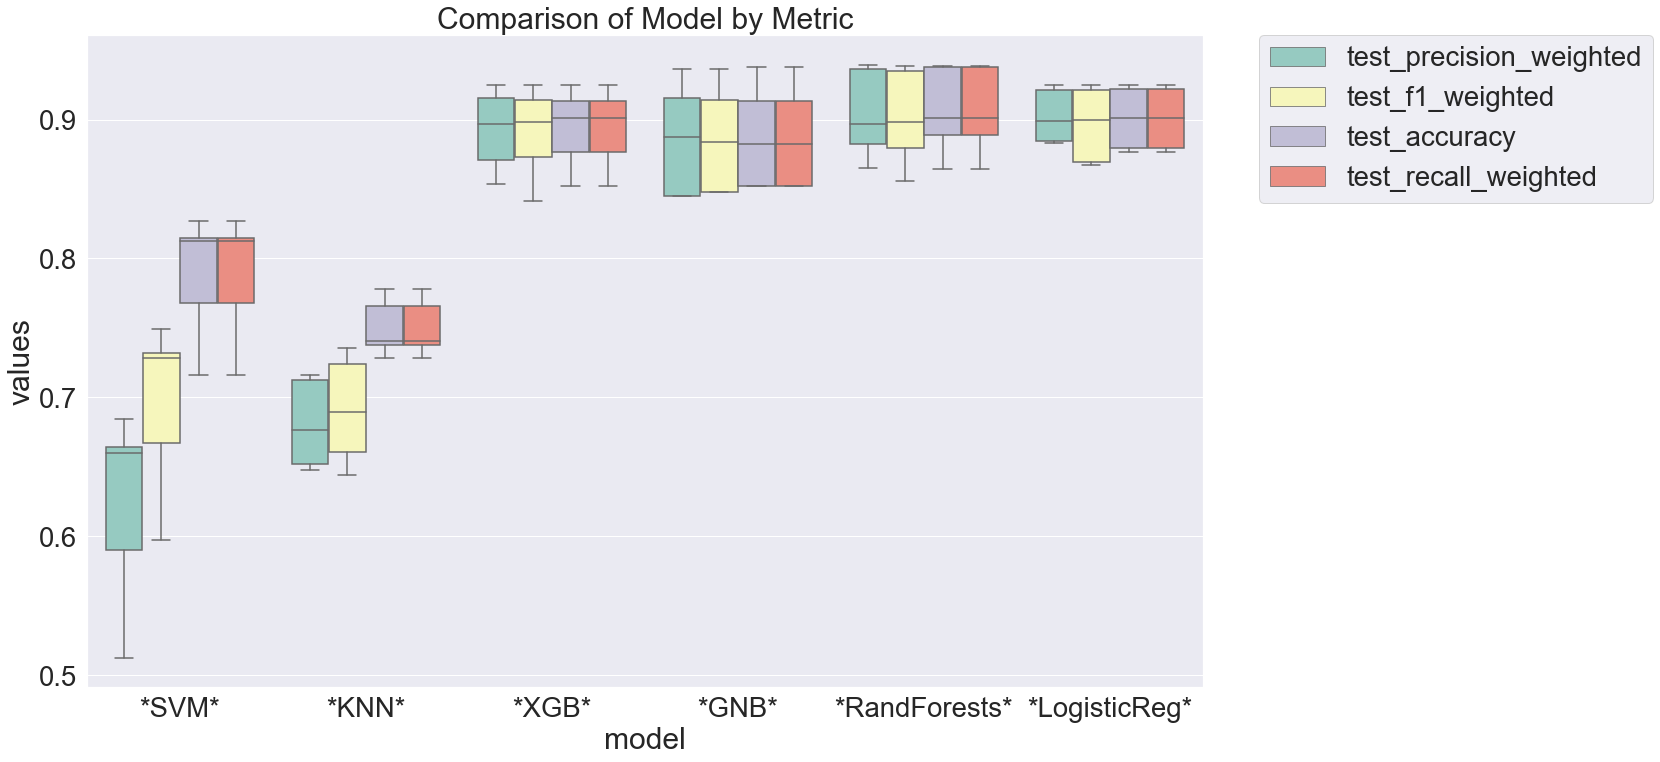

In [36]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Metric')
plt.show()

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
    با این نمودار میتوان متوجه شد که دو الگوریتم
    SVM و
    KNN
    به خوبی در زمان 
   train
    بر روی تمام معیارها
    fit
    نمیشوند و الگوریتم های دیگر بهتر
    fit
    می شوند.
    </font>
</div>

 <div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=4 color='purple'>
    **Time metrics Boxplot
    </font>
</div>

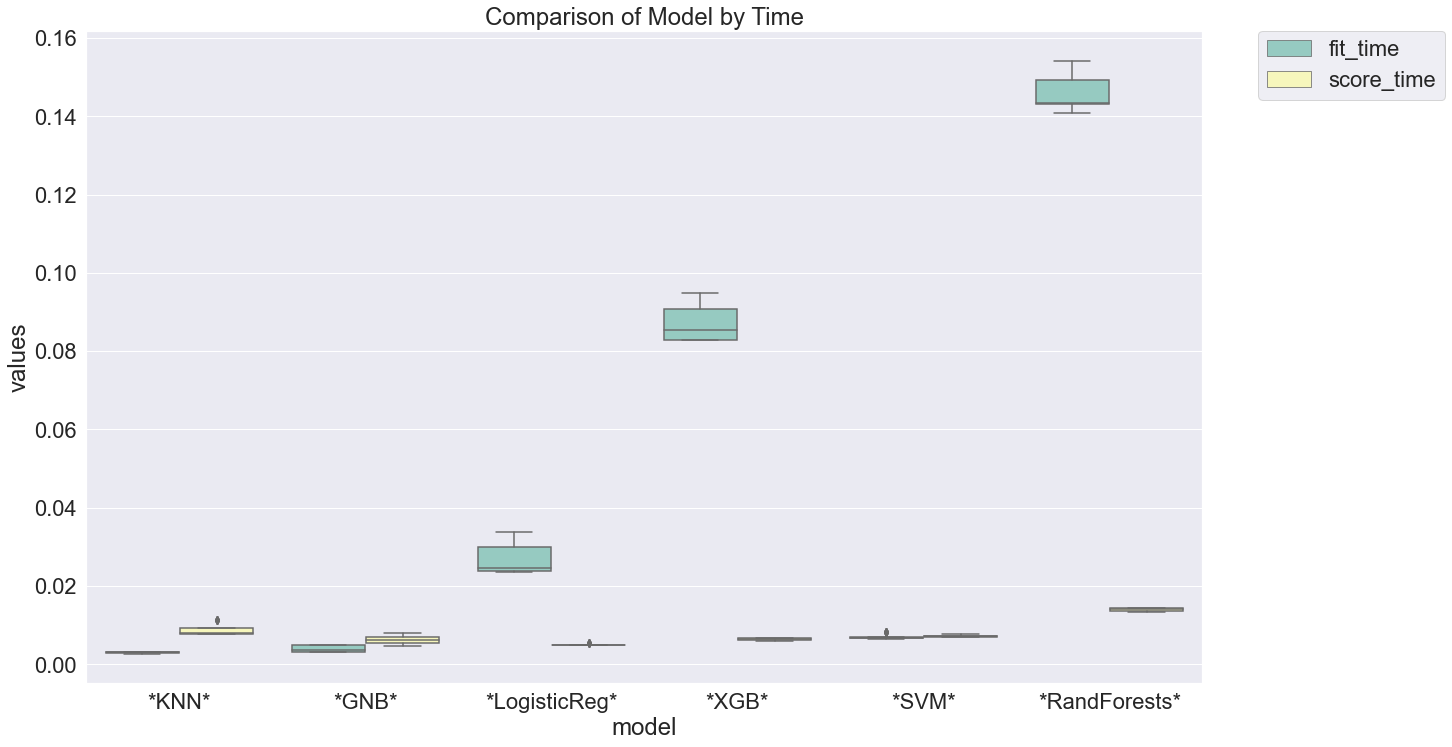

In [37]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Time')
plt.show()

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
در نمودار مقایسه‌ی زمان ها می بینیم که زمان تست الگوریتم‌ها کم هستند ولی زمان یادگیری ها متفاوت و بیشتر است.
    زمان 
    train
    در الگوریتم
    Radomforest , XGB
    نسبت به سایر الگوریتم‌ها بیشتر هستد که باتوجه به ماهیت الگوریتم وحجم داده منطقی است .
    زمان یادگیری الگوریتم
    LogisticRegression
    نسبت به دو الگوریتم گفته شده، بهتر و مناسب تر می‌باشد.
    </font>
</div>

<hr>
<hr>



 <div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=5 color='purple'>
    *
    Final Model
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
مدل نهایی که میتوان در نهایت در نظر گرفت الگوریتم
    LogisticRegression
    می باشد. این مدل عملکرد مشابهی با الگوریتم‌های
    high performance
    دارد ولی در زمان مطلوب تری 
    train
    می‌شود.
       توجه شود که اگر معیار زمان برایمان اهمیت نداشت و تنها بر اساس معیارهای 
    performance
    انتخاب می‌کردیم. الگوریتم‌های
    GNB , XGB
    مدل مناسبی می‌بودند.
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=4 color='purple'>
    **
 خلاصه ای از مدل
    </font>
</div>

  <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
 LogisticRegression
یک الگوریتم طبقه بندی یادگیری ماشین است که برای پیش بینی احتمال یک متغیر وابسته استفاده می شود. در 
LogisticRegression ،
متغیر وابسته یک متغیر باینری است که شامل داده های کد شده به صورت 1  یا 0  است. به عبارت دیگر ، مدل
LogisticRegression
 را به عنوان تابعی از X پیش بینی می کند.
 P (Y = 1)
    <br>
این مدل برای 
    train
    و پیاده سازی و تفسیر بسیار مناسب است و به راحتی برای حالت چندکلاسه میتواند گسترش یابد. احتمال 
    overfitting
    در آن کم است .
    <br>
اما اگر تعداد نمونه‌ها از ویژگی ها کمتر شود باعث 
    overfitting
    شده و مدل مناسبی نخواهد بود. هم چنین این مدل برای داده هایی که به صورت خطی جدا نمی شوند نامناسب است
    </font>
</div>

<hr>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
اکنون برای بهینه تر کردن مدل پارامترهای مدل
    را بررسی کرده تا عملکرد را بهتر کنیم.
    با بررسی پارامترهای این الگوریتم
    در کتابخانه
    sklearn
    پارامتر 
    solver = libnear
    میزان عملکرد را افزایش می دهد.
   </font>
</div>

In [38]:
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("F1_score:",f1_score(y_test, y_pred,average='weighted') 
              , "-- Accuracy:",accuracy_score(y_test, y_pred),
               "-- Precision:",precision_score(y_test, y_pred,average='weighted'),
                "-- Recall:",recall_score(y_test, y_pred,average='weighted'))

F1_score: 0.8454989504680613 -- Accuracy: 0.8592592592592593 -- Precision: 0.8573368286616925 -- Recall: 0.8592592592592593


 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=4 color='purple'>
    **
بررسی میزان اهمیت مدل به ویژگی‌ها 
    -
    Feature Imoportance
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
 Feature Imoportance
    به دسته ای از تکنیک ها برای تخصیص امتیاز به ویژگی های ورودی به یک مدل پیش بینی کننده اشاره دارد که اهمیت نسبی هر ویژگی را هنگام پیش بینی نشان می دهد.
score
    های
    Feature Imoportance
    را می توان برای مسائلی مانند 
    regression
    و
    classification
    استفاده کرد.
این نمرات می توانند در طیف وسیعی از مسئله‌های مدل سازی استفاده شوند ، مانند
    :
   <br>
    *
درک بهتر داده ها
    <br>
    *
درک بهتر یک مدل
      <br>
    *
کاهش تعداد ویژگی های ورودی
      <br> 
    score
    نسبی می تواند مشخص کند که کدام ویژگی ها ممکن است بیشترین ارتباط را با هدف داشته باشند و برعکس این که کدام ویژگی کمترین ارتباط را دارند. 
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
برای به دست اوردن
Feature importance score
انواع زیادی وجود دارد که یکی از پر کاربردترین آنها به دست اوردن
Coefficients
هاست. درواقع این مقادیر را میتوان به عنوان
این امتیاز در نظر گرفت . لذا داریم:
        </font>
</div>

['Feature: 0, Score: -0.00316', 'Feature: 1, Score: -0.37461', 'Feature: 2, Score: 0.01314', 'Feature: 3, Score: -0.77631', 'Feature: 4, Score: 0.57433', 'Feature: 5, Score: -1.08650', 'Feature: 6, Score: -0.58380', 'Feature: 7, Score: -0.38854', 'Feature: 8, Score: 0.10794', 'Feature: 9, Score: 0.38209', 'Feature: 10, Score: -0.09883', 'Feature: 11, Score: -0.04000', 'Feature: 12, Score: -0.06073', 'Feature: 13, Score: -0.04745', 'Feature: 14, Score: -0.68482', 'Feature: 15, Score: -0.23982', 'Feature: 16, Score: -0.04738', 'Feature: 17, Score: 0.45518', 'Feature: 18, Score: -0.37750', 'Feature: 19, Score: -0.32017', 'Feature: 20, Score: -0.15902', 'Feature: 21, Score: 0.21003', 'Feature: 22, Score: -0.80876', 'Feature: 23, Score: 0.57814', 'Feature: 24, Score: -0.11839', 'Feature: 25, Score: 0.63779', 'Feature: 26, Score: 0.25988', 'Feature: 27, Score: 0.46107', 'Feature: 28, Score: -0.08390', 'Feature: 29, Score: -0.14956', 'Feature: 30, Score: -0.35441', 'Feature: 31, Score: -0.029

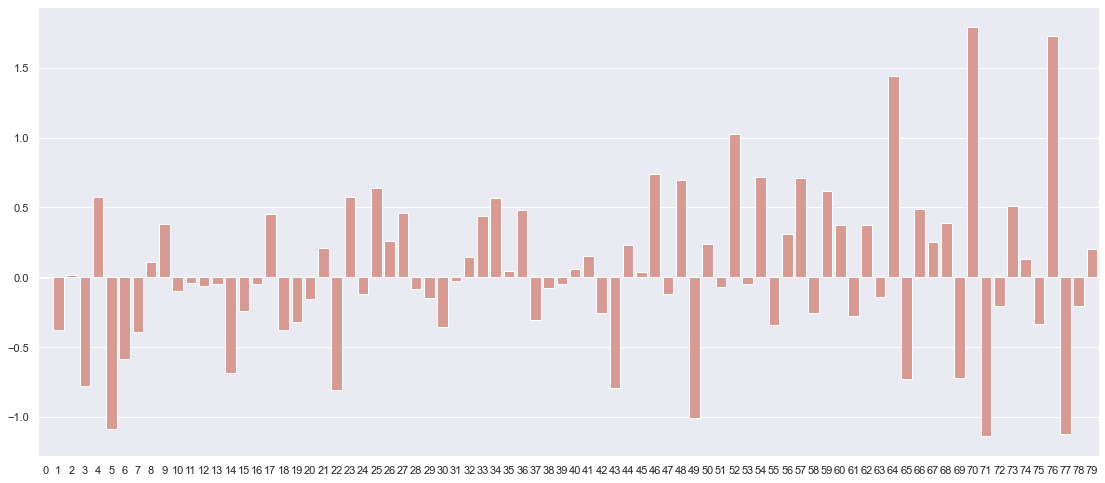

In [39]:

importance = clf.coef_[0]
importances =[]
for i,v in enumerate(importance):
    importances.append(('Feature: %0d, Score: %.5f' % (i,v)))
    
print(importances)    
# plot feature importance

sns2.set(rc={'figure.figsize':(19,8.27)})
sns2.barplot([x for x in range(len(importance))], importance,
                 color="salmon", saturation=.5)
plt.show()


 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
لیست
    importances
    مقادیر امتیازها را نشان میدهد که برای شهود بهتر به صورت نمودار رسم شده است.
    مقادیر منفی ویژگی‌هایی هستند که کلاس صفر
    را
    predict
    میکنند و مقادیر مثبت ویژگی‌هایی هستند که کلاس یک را پیش بینی میکنند.
    </font>
</div>

<hr>
<hr>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=4 color='purple'>
    **
    پیش بینی زودهنگام
 -
    Early predictioin 
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
برای بررسی پیش بینی زودهنگام نمونه‌هایی که در آن بیمار اطلاعاتش در بازه‌ی
   0-2
    ساعت ثبت شده باشد را از داده های جدا کرده و مدل را روی آن تست می‌کنیم
    . 
     در بخش ابتدایی برای یکپارچه شدن دیتاست داده های 
    window
    را به اعداد یک تا ۶ 
    نگاشت کردیم لذا کافی است ردیف‌هایی که 
    window
    آنها برابر یک است را جدا کنیم:
    </font>
</div>

In [40]:
filter_data = limited_data.loc[limited_data['WINDOW'] == 1 ]
filter_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
10,2,0,10,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0
20,4,0,10,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0
25,5,0,10,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0
30,6,1,70,1,0.0,1.0,1.0,0.605263,-1.0,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0
35,7,0,20,0,1.0,0.0,1.0,0.605263,-1.0,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,372,1,80,0,1.0,1.0,1.0,0.605263,-1.0,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0
1865,373,1,90,1,0.0,0.0,0.0,0.605263,-1.0,-0.895288,...,-1.000000,-0.979798,-0.928036,-0.634774,-1.000000,-1.000000,-1.000000,-0.979381,1,0
1880,376,1,90,0,1.0,1.0,1.0,0.605263,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0
1885,377,0,20,1,0.0,1.0,1.0,0.578947,-1.0,-1.000000,...,-0.571429,-0.878788,-0.647826,-0.529477,-0.658164,-0.695341,-0.570241,-0.881390,1,0


In [41]:
X = filter_data.iloc[: ,:-1]
y = filter_data.iloc[: ,-1]


metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.15, random_state=8675309)

clf = LogisticRegression(solver='liblinear')
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=901234)
cv_results = model_selection.cross_validate(clf, X_train, y_train, cv=kfold, scoring=metrics)
clf.fit(X_tr, y_tr)
y_pre = clf.predict(X_te)
print("F1_score:",f1_score(y_te, y_pre,average='weighted') 
              , "-- Accuracy:",accuracy_score(y_te, y_pre),
               "-- Precision:",precision_score(y_te, y_pre,average='weighted'),
                "-- Recall:",recall_score(y_te, y_pre,average='weighted'))

F1_score: 0.9217638691322904 -- Accuracy: 0.9473684210526315 -- Precision: 0.8975069252077561 -- Recall: 0.9473684210526315


 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3 >
در این حالت چون ویژگی جدید 
    Window
    فیلتر شده است، پیچیدگی مدل را کمتر میکند. لذا دقت مدل بالاتر میرود.
    مدل با دقت خوبی توانایی پیشبینی زودهنگام را دارد.
    </font>
</div>

 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=4 color='green'>
منابع
    </font>
</div>

 <div style="direction:ltr;line-height:300%;"><font face="XB Zar" size=3 color='gray'>
    https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/
    <br>
    https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
    <br>
https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0
    <br>
    https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e
    <br>
    https://machinelearningmastery.com/calculate-feature-importance-with-python/
    </font>
</div>